<a href="https://colab.research.google.com/github/befragment/misis_ml/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MISIS AI Lab

В данном домашнем задании, применяя все изучениенные алгоритмы ML, а в частности Деревья решений и Ансамбли, необходимо решить [Kaggle Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic) соревнование. Все ответы вам предстоит отправить в этой [форме](https://forms.gle/jqqm2m2J4LWEuLpq9)

Ваша задача предсказать, какие пассажиры переместятся в другое измерение. В качестве данных вы имеете
- train.csv - личные записи примерно двух третей (~8700) пассажиров.
- test.csv - личные записи оставшейся трети (~ 4300) пассажиров. Ваша задача состоит в том, чтобы предсказать значение Transported для пассажиров в этом наборе.
- sample_submission.csv - файл отправки в правильном формате.

Вам необходимо провести полный анализ данных и использовать алгоритмы ML, которые мы уже изучили. План, который необходимо реализовать при решении задачи:
- Распаковка данных
- Выявление количественных признаков о каждой фиче
- Построение зависимостей всех фичей со значением Transported
- Заполнение пропусков в данных
- Кодирование значений фичей
- Обучение моделей с помощью sklearn: LogisticRegression, SVC, LinearSVC, KNN, DecisionTreeClassifier, RandomForestClassifier

### Задание считается выполненым, если сделаны все пункты выше и скор на приватной тестовой выборке Kaggle >= 0.8

Мягкий дедлайн: 12 ноября 23:59 \
Жесткий дедлайн: 15 ноября 23:59

## Start

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import random

In [304]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

## Some train data

In [305]:
train.head(31)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [306]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [307]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Some features vs total transportation

In [308]:
total_transp = train[train['Transported']]
total_not_transp = train[train['Transported'] == 0]

print(f"transp: {len(total_transp)}, {round(len(total_transp) / len(train), 3) * 100}%")
print(f"not transp: {len(total_not_transp)}, {round(len(total_not_transp) / len(train), 3) * 100}%")

transp: 4378, 50.4%
not transp: 4315, 49.6%


## VIP vs transportation

In [309]:
train['VIP'] = train['VIP'].replace(False, 0).replace(True, 1)
train['VIP'].head(3)

0    0.0
1    0.0
2    1.0
Name: VIP, dtype: float64

In [310]:
train.groupby('VIP').Transported.value_counts()

VIP  Transported
0.0  True           4198
     False          4093
1.0  False           123
     True             76
Name: Transported, dtype: int64

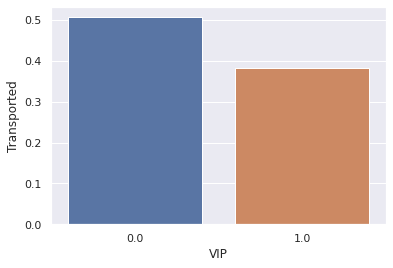

In [311]:
sns.barplot(x='VIP', y='Transported', data=train, ci=None)

***Conclusion***: not VIP passengers tend to be transported

## Spendings vs transportation

In [312]:
spendings = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['TotalSpendings'] = 0
for i in spendings:
  train['TotalSpendings'] += train[i]

In [313]:
train['Transported'] = train['Transported'].replace(True, 1).replace(False, 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


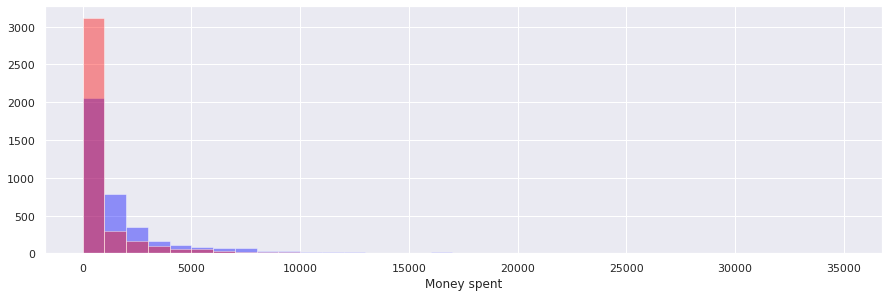

In [314]:
fig = plt.figure(figsize=[15,10])

ax1 = fig.add_subplot(211)
sns.distplot(train[train['Transported'] == False]['TotalSpendings'].dropna().values, bins=range(0, 35987, 1000), kde=False, color='blue', ax = ax1)
sns.distplot(train[train['Transported'] == True]['TotalSpendings'].dropna().values, bins=range(0, 35987, 1000), kde=False, color='red', axlabel='Money spent', ax = ax1)


In [315]:
train['TotalSpendings'].max()

35987.0

***Conclusion***: those who didn't spend a lot of money on spaceship board were transported 

## HomePlanet vs Transportation 

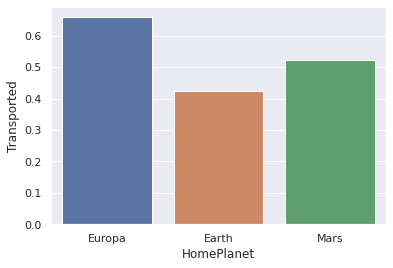

In [316]:
sns.barplot(x='HomePlanet', y='Transported', data=train, ci=None)

***Conclusion***: Earth's inhabitants tend to stay safe on the spaceship, inhabitants of the Europa on the contrary

## Cryosleep vs transportation

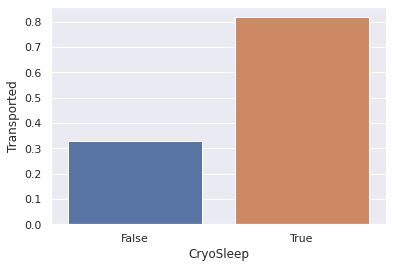

In [317]:
sns.barplot(x='CryoSleep', y='Transported', data=train, ci=None)

***Conclusion***: most of those who were in CryoSleep were transported

## Cabin vs transportation

In [318]:
train['Cabin'] = train['Cabin'].fillna('P')
train['Cabin'] = [i[-1] for i in train['Cabin']]

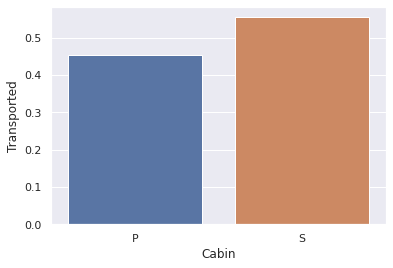

In [319]:
sns.barplot(x='Cabin', y='Transported', data=train, ci=None)

***conclusion***: S-cabin passengers tend to be transported

## Destination vs transportation

In [320]:
set(train['Destination'])

{'55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan}

In [321]:
train['Destination'] = train['Destination'].fillna(random.choice(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']))
# random values don't influence total statistics at all
train['Destination']

0         TRAPPIST-1e
1         TRAPPIST-1e
2         TRAPPIST-1e
3         TRAPPIST-1e
4         TRAPPIST-1e
            ...      
8688      55 Cancri e
8689    PSO J318.5-22
8690      TRAPPIST-1e
8691      55 Cancri e
8692      TRAPPIST-1e
Name: Destination, Length: 8693, dtype: object

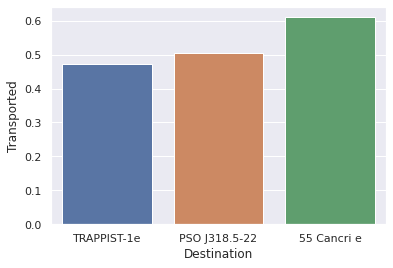

In [322]:
sns.barplot(x='Destination', y='Transported', data=train, ci=None)

***Conclusion***: '55 Cancri e' destination was the most dangerous

## Age vs transportation

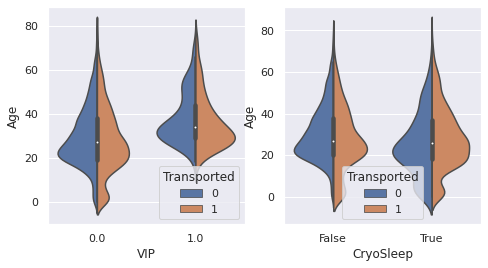

In [323]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

sns.violinplot(x="VIP", y="Age", hue="Transported", data=train, split=True, ax=ax1)
sns.violinplot(x="CryoSleep", y="Age", hue="Transported", data=train, split=True, ax=ax2)

***Conclusion***: 
1. 20yo VIP transportation is low
2. Those children who weren't in CryoSleep tend to be transported

## Summary

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


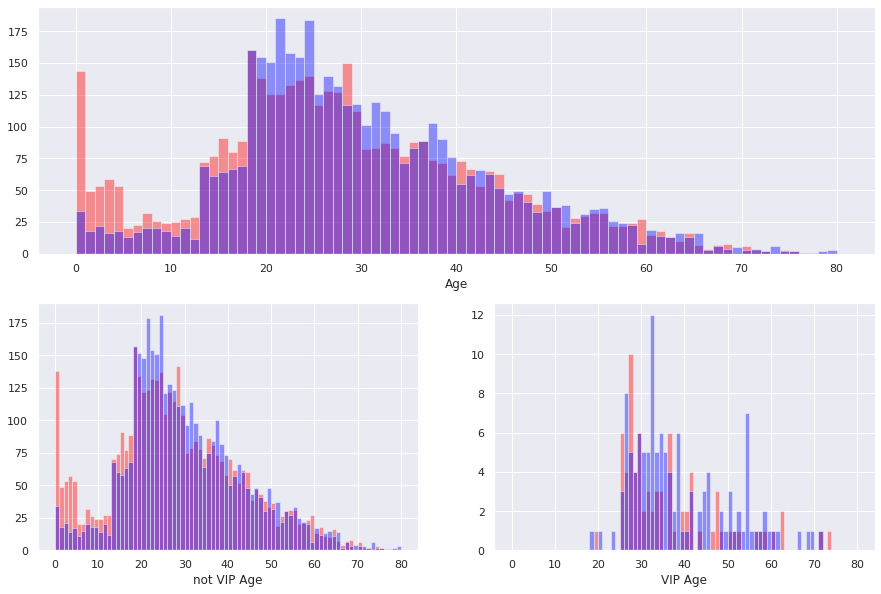

In [324]:
total_transp = train[train['Transported']==1]
total_not_transp = train[train['Transported']==0]
VIP_transp = train[(train['Transported']==1) & (train['VIP']==1)]
not_VIP_transp = train[(train['Transported']==1) & (train['VIP']==0)]
VIP_not_transp = train[(train['Transported']==0) & (train['VIP']==1)]
not_VIP_not_transp = train[(train['Transported']==0) & (train['VIP']==0)]

fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(211)
sns.distplot(total_transp['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', ax = ax1)
sns.distplot(total_not_transp['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', axlabel='Age', ax = ax1)

ax2 = fig.add_subplot(223)
sns.distplot(not_VIP_transp['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', ax = ax2)
sns.distplot(not_VIP_not_transp['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', axlabel='not VIP Age', ax = ax2)

ax3 = fig.add_subplot(224)
sns.distplot(VIP_transp['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', ax=ax3)
sns.distplot(VIP_not_transp['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', axlabel='VIP Age', ax=ax3)


***Conclusion***: 
1. People in twenties who weren't VIP stayed on the spaceship
2. Not VIP children tend to be transported
3. VIP clients who in their thirties have a big chance to stay on the board

# Correlation

In [325]:
corr_matrix = train.corr()
corr_matrix

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalSpendings
Age,1.000000,0.092819,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,0.189475
VIP,0.092819,1.000000,0.058785,0.129799,0.018295,0.061059,0.125974,-0.037650,0.170024
RoomService,0.068723,0.058785,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,0.235768
FoodCourt,0.130421,0.129799,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,0.747214
ShoppingMall,0.033133,0.018295,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,0.224083
Spa,0.123970,0.061059,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,0.597796
VRDeck,0.101007,0.125974,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,0.573186
Transported,-0.075026,-0.037650,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,-0.197671
TotalSpendings,0.189475,0.170024,0.235768,0.747214,0.224083,0.597796,0.573186,-0.197671,1.000000


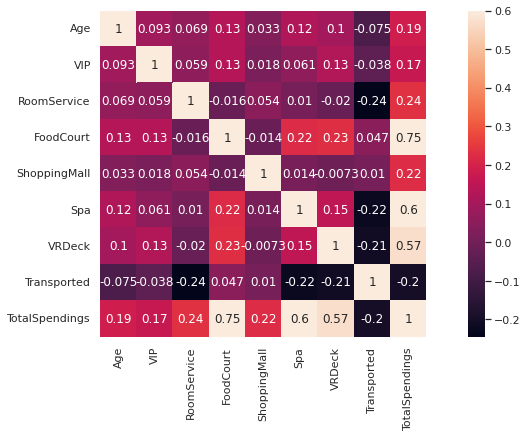

In [326]:
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

# Feature extraction

## First of all, lets make both train and test tables' headers same as our test table were edited during data analysis

In [327]:
test['Cabin'] = test['Cabin'].fillna('S')
test['Cabin'] = [i[-1] for i in test['Cabin']]

test['VIP'] = test['VIP'].replace(False, 0).replace(True, 1)

spendings = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
test['TotalSpendings'] = 0
for i in spendings:
  test['TotalSpendings'] += test[i]

In [328]:
train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpendings
0,0001_01,Europa,False,P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0
1,0002_01,Earth,False,S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0


In [329]:
test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,TotalSpendings
0,0013_01,Earth,True,S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0
1,0018_01,Earth,False,S,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0


## Let's combine our datasets

In [330]:
train_test_data = [train, test]

## Now we can start our feature extraction

### HomePlanet

In [331]:
set(train['HomePlanet'])

{'Earth', 'Europa', 'Mars', nan}

In [332]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [333]:
for dataset in train_test_data:
  dataset['HomePlanet'] = dataset['HomePlanet'].fillna('Earth')

In [334]:
planets_mapping = {
    'Earth': 2,
    'Europa': 1,
    'Mars': 0
}

for dataset in train_test_data:
  dataset['HomePlanet'] = dataset['HomePlanet'].map(planets_mapping)

In [335]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpendings
0,0001_01,1,False,P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0
1,0002_01,2,False,S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0
2,0003_01,1,False,S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0
3,0003_02,1,False,S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0
4,0004_01,2,False,S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0
5,0005_01,2,False,P,PSO J318.5-22,44.0,0.0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,774.0
6,0006_01,2,False,S,TRAPPIST-1e,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1,1584.0
7,0006_02,2,True,S,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1,NaN
8,0007_01,2,False,S,TRAPPIST-1e,35.0,0.0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1,1018.0
9,0008_01,1,True,P,55 Cancri e,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1,0.0


### CryoSleep

In [336]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [337]:
for dataset in train_test_data:
  dataset['CryoSleep'] = dataset['CryoSleep'].fillna(False)
  dataset['CryoSleep'] = dataset['CryoSleep'].replace(False, 0).replace(True, 1).astype(int)

### Cabin

In [338]:
for ds in train_test_data:
  print(ds['Cabin'].value_counts())

P    4405
S    4288
Name: Cabin, dtype: int64
S    2193
P    2084
Name: Cabin, dtype: int64


In [339]:
cabin_mapping = {
    'S': 0, 
    'P': 1
}

for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping).astype(int)

train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpendings
0,0001_01,1,0,1,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0
1,0002_01,2,0,0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0
2,0003_01,1,0,0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0
3,0003_02,1,0,0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0
4,0004_01,2,0,0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0
5,0005_01,2,0,1,PSO J318.5-22,44.0,0.0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,774.0
6,0006_01,2,0,0,TRAPPIST-1e,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1,1584.0
7,0006_02,2,1,0,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1,NaN
8,0007_01,2,0,0,TRAPPIST-1e,35.0,0.0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1,1018.0
9,0008_01,1,1,1,55 Cancri e,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1,0.0


### Destination

In [340]:
train['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [341]:
destination_mapping = {
    'TRAPPIST-1e': 2,
    '55 Cancri e' : 1,
    'PSO J318.5-22': 0
}

In [342]:
for dataset in train_test_data:
  dataset['Destination'] = dataset['Destination'].fillna('TRAPPIST-1e')
  dataset['Destination'] = dataset['Destination'].map(destination_mapping).astype(int)

### Age

In [343]:
for dataset in train_test_data:
  age_avg = dataset['Age'].mean()
  age_std = dataset['Age'].std()
  age_null_count = dataset['Age'].isnull().sum()

  age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
  dataset['Age'] = dataset['Age'].astype(int)

train['AgeBand'] = pd.cut(train['Age'], 5)

print(train[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index=False).mean())

          AgeBand  Transported
0  (-0.079, 15.8]     0.648133
1    (15.8, 31.6]     0.475721
2    (31.6, 47.4]     0.483536
3    (47.4, 63.2]     0.486747
4    (63.2, 79.0]     0.463235


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [344]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 15.8, 'Age'] = 4
    dataset.loc[(dataset['Age'] > 15.8) & (dataset['Age'] <= 31.6), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 31.6) & (dataset['Age'] <= 47.4), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47.4) & (dataset['Age'] <= 63.2), 'Age'] = 1
    dataset.loc[ dataset['Age'] > 63.2, 'Age'] = 0
    
train.head(6)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpendings,AgeBand
0,0001_01,1,0,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,"(31.6, 47.4]"
1,0002_01,2,0,0,2,3,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,"(15.8, 31.6]"
2,0003_01,1,0,0,2,1,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,"(47.4, 63.2]"
3,0003_02,1,0,0,2,2,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,"(31.6, 47.4]"
4,0004_01,2,0,0,2,3,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,"(15.8, 31.6]"
5,0005_01,2,0,1,0,2,0.0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,774.0,"(31.6, 47.4]"


### Total spendings

In [345]:
train['SpendingsBand'] = train['TotalSpendings'].fillna(train['TotalSpendings'].median())
train['SpendingsBand'] = pd.qcut(train['TotalSpendings'], 2)
print(train[['SpendingsBand', 'Transported']].groupby(['SpendingsBand'], as_index=False).mean())

      SpendingsBand  Transported
0   (-0.001, 736.0]     0.704084
1  (736.0, 35987.0]     0.300874


In [346]:
for dataset in train_test_data:
  dataset.loc[dataset['TotalSpendings'] <= 736.0, 'TotalSpendings'] = 0
  dataset.loc[dataset['TotalSpendings'] > 736.0, 'TotalSpendings'] = 1

In [347]:
train['TotalSpendings'].value_counts()

0.0    3893
1.0    3892
Name: TotalSpendings, dtype: int64

In [348]:
for dataset in train_test_data:
  dataset['TotalSpendings'] = dataset['TotalSpendings'].fillna(0).astype(int)

In [349]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpendings,AgeBand,SpendingsBand
0,0001_01,1,0,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,"(31.6, 47.4]","(-0.001, 736.0]"
1,0002_01,2,0,0,2,3,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,"(15.8, 31.6]","(-0.001, 736.0]"
2,0003_01,1,0,0,2,1,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,"(47.4, 63.2]","(736.0, 35987.0]"
3,0003_02,1,0,0,2,2,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,"(31.6, 47.4]","(736.0, 35987.0]"
4,0004_01,2,0,0,2,3,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,"(15.8, 31.6]","(736.0, 35987.0]"
5,0005_01,2,0,1,0,2,0.0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,1,"(31.6, 47.4]","(736.0, 35987.0]"
6,0006_01,2,0,0,2,3,0.0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1,1,"(15.8, 31.6]","(736.0, 35987.0]"
7,0006_02,2,1,0,2,3,0.0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1,0,"(15.8, 31.6]",NaN
8,0007_01,2,0,0,2,2,0.0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1,1,"(31.6, 47.4]","(736.0, 35987.0]"
9,0008_01,1,1,1,1,4,0.0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1,0,"(-0.079, 15.8]","(-0.001, 736.0]"


### VIP

In [350]:
train['VIP'].value_counts()

0.0    8291
1.0     199
Name: VIP, dtype: int64

In [351]:
for dataset in train_test_data:
  dataset['VIP'] = dataset['VIP'].fillna(0).astype(int)

### Now we are getting rid of useless columns

In [352]:
features_to_drop = ['Name', 'RoomService', 
                    'FoodCourt', 'ShoppingMall', 
                    'Spa', 'VRDeck']
train = train.drop(features_to_drop, axis=1)
test = test.drop(features_to_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

train = train.drop(['AgeBand'], axis=1)
train = train.drop(['SpendingsBand'], axis=1)

### Converted data visualization

In [353]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,TotalSpendings
0,1,0,1,2,2,0,0,0
1,2,0,0,2,3,0,1,0
2,1,0,0,2,1,1,0,1
3,1,0,0,2,2,0,0,1
4,2,0,0,2,3,0,1,1


In [354]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpendings
0,0013_01,2,1,0,2,3,0,0
1,0018_01,2,0,0,2,3,0,1
2,0019_01,1,1,0,1,3,0,0
3,0021_01,1,0,0,2,2,0,1
4,0023_01,2,0,0,2,3,0,0


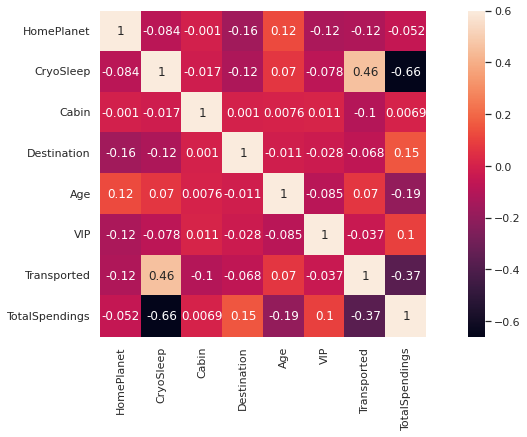

In [355]:
plt.figure(figsize=(15,6))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

# Modeling

## Data Classification

In [356]:
X_train = train.drop('Transported', axis=1)
y_train = train['Transported']

X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((8693, 7), (8693,), (4277, 7))

In [357]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpendings
0,1,0,1,2,2,0,0
1,2,0,0,2,3,0,0
2,1,0,0,2,1,1,1
3,1,0,0,2,2,0,1
4,2,0,0,2,3,0,1
...,...,...,...,...,...,...,...
8688,1,0,1,1,2,1,1
8689,2,1,0,0,3,0,0
8690,2,0,0,2,3,0,1
8691,1,0,0,1,2,0,1


In [358]:
y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [359]:
X_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpendings
0,2,1,0,2,3,0,0
1,2,0,0,2,3,0,1
2,1,1,0,1,3,0,0
3,1,0,0,2,2,0,1
4,2,0,0,2,3,0,0
...,...,...,...,...,...,...,...
4272,2,1,0,2,2,0,0
4273,2,0,0,2,2,0,1
4274,0,1,1,1,3,0,0
4275,1,0,1,2,3,0,1


## Algorithms

In [360]:
# Importing different classifier modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

### Logistic Regression

In [361]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

72.27 percent


### SVM

In [362]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (f'{acc_svc} percent')

73.22 percent


### Lineal SVM

In [363]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (f'{acc_linear_svc} percent')

72.2 percent


### KNN

In [364]:
clf = KNeighborsClassifier(n_neighbors = 100)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (f'{acc_knn} percent')

73.5 percent


### Decision Trees

In [365]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (f'{acc_decision_tree} percent')

74.08 percent


### Random Forest


In [366]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (f'{acc_random_forest} percent')

74.08 percent


### Gaussian Naive Bayes

In [367]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (f'{acc_gnb} percent')

71.78 percent


### Perceptron

In [368]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (f'{acc_perceptron} percent')

67.12 percent


### SGD

In [369]:
clf = SGDClassifier(max_iter=6, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (f'{acc_sgd} percent')

71.62 percent


### Algorithms comparison

In [370]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,74.08
5,Random Forest,74.08
3,KNN,73.50
1,Support Vector Machines,73.22
0,Logistic Regression,72.27
2,Linear SVC,72.20
6,Naive Bayes,71.78
8,Stochastic Gradient Decent,71.62
7,Perceptron,67.12


# Submission

In [386]:
random_forest = y_pred_random_forest.astype(bool)
random_forest

array([ True, False,  True, ...,  True, False,  True])

In [387]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": random_forest
    })
submission.to_csv('submission1.csv', index=False)